# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


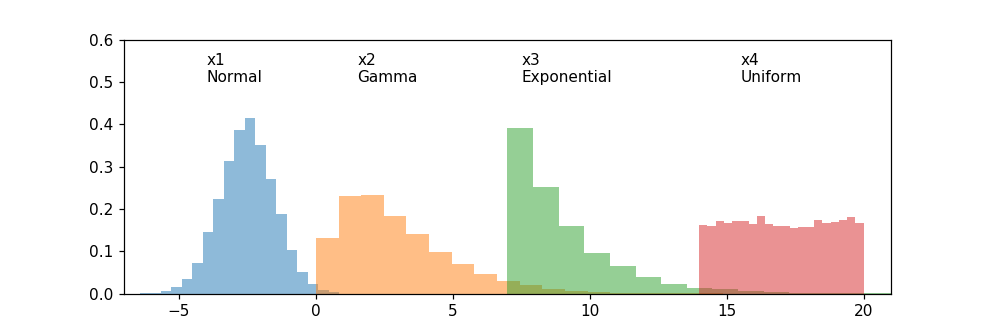

Text(15.514212178181857, 0.5, 'x4\nUniform')

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5);
plt.hist(x2, density=True, bins=20, alpha=0.5);
plt.hist(x3, density=True, bins=20, alpha=0.5);
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


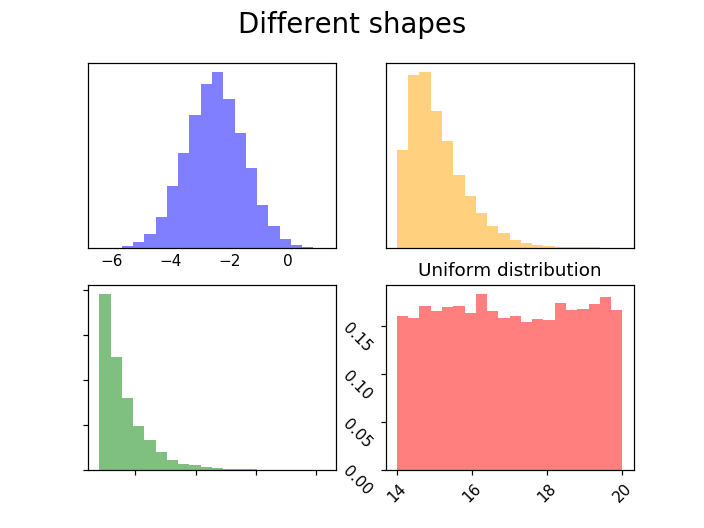

Text(0.5, 0.98, 'Different shapes')

In [11]:
#using subplots
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
ax1 = plt.subplot(2, 2, 1)
plt.hist(x1, density=True, bins=20, alpha=0.5, color='blue')
#show both axis
ax1.tick_params(axis ='both', which ='both', length = 0)
ax1.axes.get_yaxis().set_visible(False)

ax2 = plt.subplot(2, 2, 2)
plt.hist(x2, density=True, bins=20, alpha=0.5, color='orange')
#hide both axis
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3 = plt.subplot(2, 2, 3)
plt.hist(x3, density=True, bins=20, alpha=0.5, color='green')
#hide both axis, but keep the markers
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.xaxis.set_major_formatter(plt.NullFormatter())

ax4 = plt.subplot(2, 2, 4)
plt.hist(x4, density=True, bins=20, alpha=0.5, color='red')
#rorate the axis
ax4.tick_params(axis ='x', rotation = 45)
ax4.tick_params(axis ='y', rotation =-45)
#change xticks
ax4.set_xticks(np.arange(14, 21, 2)) 
#insert a title in subplot
ax4.set_title('Uniform distribution')

#generate a graph title
plt.suptitle('Different shapes', fontsize=18)

####Change ticks in graphs without subplots
#plt.xticks(np.arange(0, 51, 5)) 
#plt.yticks(np.arange(0, 11, 1))

<IPython.core.display.Javascript object>


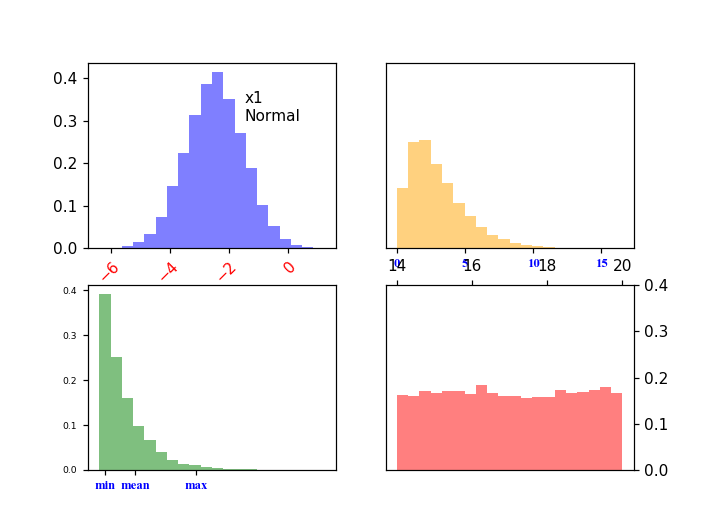

In [12]:
# create a 2x2 grid of subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2)#, sharey=True)

ax1.hist(x1, density=True, bins=20, alpha=0.5, color='blue')
ax2.hist(x2, density=True, bins=20, alpha=0.5, color='orange')
ax3.hist(x3, density=True, bins=20, alpha=0.5, color='green')
ax4.hist(x4, density=True, bins=20, alpha=0.5, color='red')

#Insert specific yticks and specify letters in ticks
ax3.set_xticks([7.5, 10, 15])
ax3.set_xticklabels(['min', 'mean', 'max'])

#change size, font, color of tick (labels)
subplots=[ax2,ax3]
for i in subplots:
    for tick in i.xaxis.get_ticklabels():
        tick.set_fontsize('small')
        tick.set_fontname('Times New Roman')
        tick.set_color('blue')
        tick.set_weight('bold')

#delete y axis in ax2         
ax2.axes.get_yaxis().set_visible(False)        
plt.setp(ax1.get_xticklabels(), rotation=45, color="r", ha="right", rotation_mode="anchor", visible=True)

#options different to sharey        
y_ax = np.arange(0, 0.5, 0.1) #values in y axis
     
#Define y ticks
ax1.set_yticks(y_ax) 
ax2.set_yticks(y_ax) 
ax3.set_yticks(y_ax) 
ax4.set_yticks(y_ax) 

#Options in y tick labels
plt.setp(ax3.get_yticklabels(), fontsize=6)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

#text
ax1.text(x1.mean()+1.0, 0.3, 'x1\nNormal')

ax4.xaxis.set_tick_params(labelbottom=False, labeltop=True, top=True, bottom=False)
ax4.yaxis.set_tick_params(labelright=True,labelleft=False, right=True, left=False)  

<IPython.core.display.Javascript object>


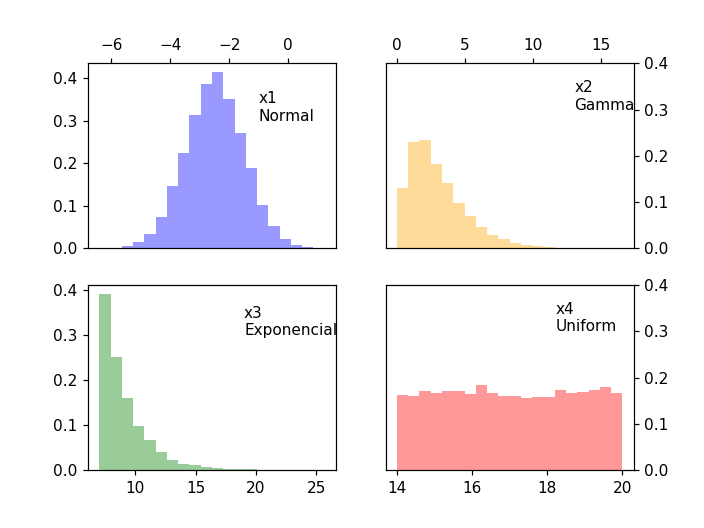

In [13]:
#Last experiment - use gridspec
import matplotlib.gridspec as gridspec

plt.figure()
widths = [1, 1]
heights = [1, 1]
gspec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)

ax11 = plt.subplot(gspec[0,0])
ax12 = plt.subplot(gspec[0,1])
ax21 = plt.subplot(gspec[1,0])
ax22 = plt.subplot(gspec[1,1])

nbins=20

ax11.hist(x1, density=True, bins=nbins, alpha=0.4, color='blue')
ax12.hist(x2, density=True, bins=nbins, alpha=0.4, color='orange')
ax21.hist(x3, density=True, bins=nbins, alpha=0.4, color='green')
ax22.hist(x4, density=True, bins=nbins, alpha=0.4, color='red')

y_ax = np.arange(0, 0.5, 0.1) #values in y axis
     
#Define y ticks
ax11.set_yticks(y_ax) 
ax12.set_yticks(y_ax) 
ax21.set_yticks(y_ax) 
ax22.set_yticks(y_ax) 

ax11.text(x1.mean()+1.5, 0.30, 'x1\nNormal')
ax12.text(x2.mean()+10.0, 0.30, 'x2\nGamma')
ax21.text(x3.mean()+10.0, 0.30, 'x3\nExponencial')
ax22.text(x4.mean()+1.2, 0.30, 'x4\nUniform')


ax11.xaxis.set_tick_params(labelbottom=False, labeltop=True, top=True, bottom=False)
ax11.yaxis.set_tick_params(labelright=False,labelleft=True, right=False, left=True)  

ax12.xaxis.set_tick_params(labelbottom=False, labeltop=True, top=True, bottom=False)
ax12.yaxis.set_tick_params(labelright=True,labelleft=False, right=True, left=False)  

ax21.xaxis.set_tick_params(labelbottom=True, labeltop=False, top=False, bottom=True)
ax21.yaxis.set_tick_params(labelright=False,labelleft=True, right=False, left=True)  

ax22.xaxis.set_tick_params(labelbottom=True, labeltop=False, top=False, bottom=True)
ax22.yaxis.set_tick_params(labelright=True,labelleft=False, right=True, left=False) 

<IPython.core.display.Javascript object>


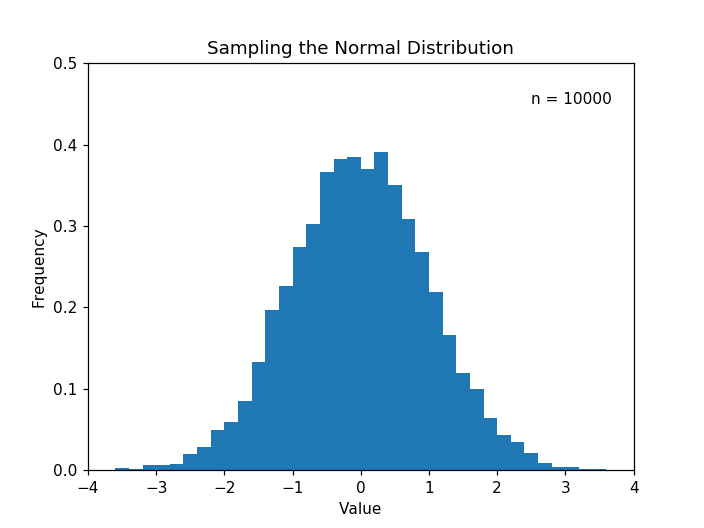

In [14]:
%matplotlib notebook

import matplotlib.animation as animation

n = 10000
x = np.random.randn(n)

def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == (n/100): 
        a.event_source.stop()
        
    plt.cla()
    bins = np.arange(-4, 4, 0.20)
    plt.hist(x[:curr*100], bins=bins, density=True)
    plt.axis([-4,4,0,0.5])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr*100), [2.5,0.45])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)    

plt.show()

<IPython.core.display.Javascript object>


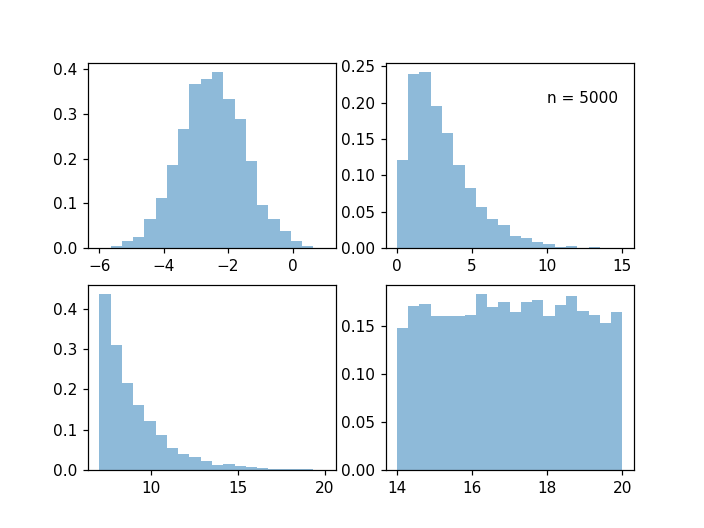

In [15]:
import numpy as np
from matplotlib.pylab import *
import matplotlib.animation as animation

# generate 4 random variables from the random, gamma, exponential, and uniform distribution
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

def updateData(curr):
    if curr == 50: 
        simulation.event_source.stop()
        
    if curr <=2: return
    
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear()
    ax1.hist(x1[:curr*100], density=True, bins=np.linspace(-6,1, num=21), alpha=0.5)
    ax2.hist(x2[:curr*100], density=True, bins=np.linspace(0,15,num=21), alpha=0.5)
    ax3.hist(x3[:curr*100], density=True, bins=np.linspace(7,20,num=21), alpha=0.5)
    ax4.hist(x4[:curr*100], density=True, bins=np.linspace(14,20,num=21), alpha=0.5)
    
    ax2.text(10, 0.20, 'n = {}'.format(curr*100))
    
simulation = animation.FuncAnimation(fig, updateData, interval=50, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


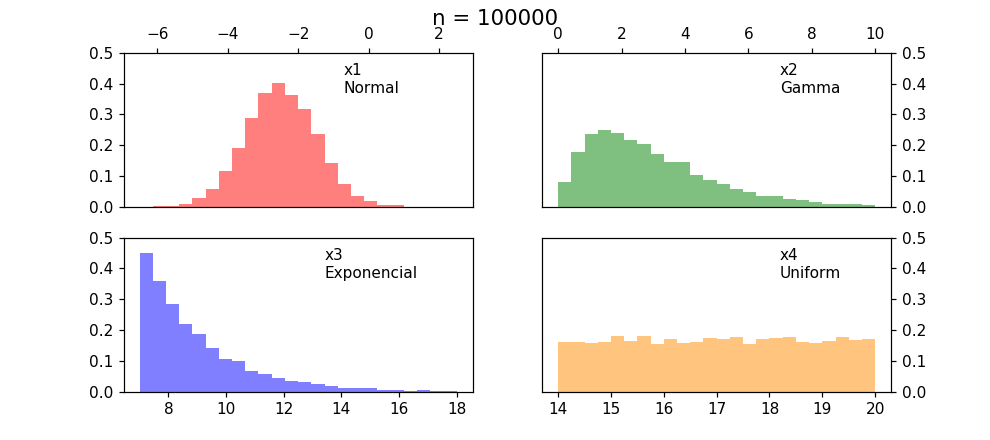

In [16]:
#consolidated
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import *

# generate 4 random variables from the random, gamma, exponential, and uniform distribution
n = 10000

x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

labx_bot=[False]*2+[True]*2
labx_top=[True]*2+[False]*2
laby_rig=[False,True]*2
laby_lef=[True,False]*2

fig, ((cx11, cx12), (cx21, cx22)) = plt.subplots(2, 2, figsize=(9,4), sharey=True)

def updFig(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == (n/100): 
        b.event_source.stop()
    #if curr <=0: return

    for ax in (cx11, cx12, cx21, cx22):
        ax.clear()
    
    cx11.hist(x1[:curr*100], density=True, color = 'red', alpha=0.5, bins=np.linspace(-6.5,2.5, num=25))
    cx12.hist(x2[:curr*100], density=True, color = 'green', alpha=0.5, bins=np.linspace(0,10, num=25)) 
    cx21.hist(x3[:curr*100], density=True, color = 'blue', alpha=0.5, bins=np.linspace(7,18, num=25)) 
    cx22.hist(x4[:curr*100], density=True, color = 'darkorange', alpha=0.5, bins=np.linspace(14,20, num=25))
    
    cx11.set_ylim(0,0.5)
    cx12.set_ylim(0,0.5)
    cx21.set_ylim(0,0.5)
    cx22.set_ylim(0,0.5)
    
    cx11.set_yticks(np.arange(0, 0.51, 0.1))
    cx12.set_yticks(np.arange(0, 0.51, 0.1))
    cx21.set_yticks(np.arange(0, 0.51, 0.1))
    cx22.set_yticks(np.arange(0, 0.51, 0.1))
    
    cx11.xaxis.set_tick_params(labelbottom=labx_bot[0], labeltop=labx_top[0], top=labx_top[0], bottom=labx_bot[0])
    cx12.xaxis.set_tick_params(labelbottom=labx_bot[1], labeltop=labx_top[1], top=labx_top[1], bottom=labx_bot[1])
    cx21.xaxis.set_tick_params(labelbottom=labx_bot[2], labeltop=labx_top[2], top=labx_top[2], bottom=labx_bot[2])
    cx22.xaxis.set_tick_params(labelbottom=labx_bot[3], labeltop=labx_top[3], top=labx_top[3], bottom=labx_bot[3])
        
    cx11.yaxis.set_tick_params(labelright=laby_rig[0], labelleft=laby_lef[0], right=laby_rig[0], left=laby_lef[0])
    cx12.yaxis.set_tick_params(labelright=laby_rig[1], labelleft=laby_lef[1], right=laby_rig[1], left=laby_lef[1])
    cx21.yaxis.set_tick_params(labelright=laby_rig[2], labelleft=laby_lef[2], right=laby_rig[2], left=laby_lef[2])
    cx22.yaxis.set_tick_params(labelright=laby_rig[3], labelleft=laby_lef[3], right=laby_rig[3], left=laby_lef[3])
    
    cx11.text(-0.7, 0.37, 'x1\nNormal')
    cx12.text(7.0, 0.37, 'x2\nGamma')
    cx21.text(13.4, 0.37, 'x3\nExponencial')
    cx22.text(18.2, 0.37, 'x4\nUniform')
    
    fig.suptitle('n = {}'.format(curr*1000), fontsize=14)

b = animation.FuncAnimation(fig, updFig, interval=100, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


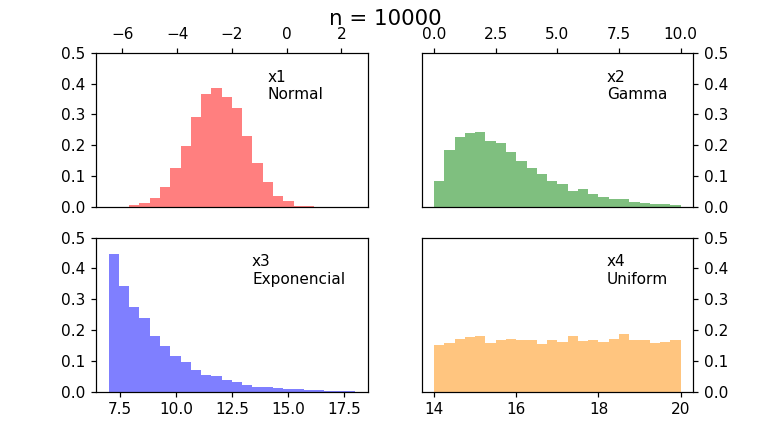

In [17]:
#I use dictionaries
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import *

# generate 4 random variables from the random, gamma, exponential, and uniform distribution
n = 10000

x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

fig, ((cx11, cx12), (cx21, cx22)) = plt.subplots(2, 2, figsize=(7,4), sharey=True)

options = {
  cx11 : {'var':x1, 'col':'red', 'bin':np.linspace(-6.5,2.5, num=25), 'xtext':-0.7, 'text':'x1\nNormal', 
          'b':False, 't':True, 'r':False, 'l':True},
  cx12 : {'var':x2, 'col':'green', 'bin':np.linspace(0,10, num=25), 'xtext':7.0, 'text':'x2\nGamma', 
          'b':False, 't':True, 'r':True, 'l':False},
  cx21 : {'var':x3, 'col':'blue', 'bin':np.linspace(7,18, num=25), 'xtext':13.4, 'text':'x3\nExponencial', 
          'b':True, 't':False, 'r':False, 'l':True},
  cx22 : {'var':x4, 'col':'darkorange', 'bin':np.linspace(14,20, num=25), 'xtext':18.2, 'text':'x4\nUniform', 
          'b':True, 't':False, 'r':True, 'l':False}}

#plt.rcParams['animation.ffmpeg_path'] = 'C:\FFmpeg\bin\ffmpeg.exe'
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

def updateFig(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == (n/200): 
        a.event_source.stop()
        
    for key, val in options.items():
        key.clear()
        key.hist(val['var'][:curr*200], density=True, color = val['col'], alpha=0.5, bins=val['bin'])
        key.set_ylim(0,0.5)
        key.set_yticks(np.arange(0, 0.51, 0.1))
        key.xaxis.set_tick_params(labelbottom=val['b'], labeltop=val['t'], top=val['t'], bottom=val['b'])
        key.yaxis.set_tick_params(labelright=val['r'], labelleft=val['l'], right=val['r'], left=val['l'])
        key.text(val['xtext'], 0.35, val['text'])
       
    fig.suptitle('n = {}'.format(curr*200), fontsize=14)
    #plt.tight_layout()

a = animation.FuncAnimation(fig, updateFig, interval=50)#, repeat=False)
plt.show()

#im_ani.save('image.mp4', writer=writer)